In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

# Device configuration
device = torch.device('mps')
batch_size = 64

In [2]:
def get_train_valid_loader(data_dir,
                           batch_size,
                           augment,
                           random_seed,
                           valid_size=0.1,
                           shuffle=True):
    normalize = transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )

    # define transforms
    valid_transform = transforms.Compose([
        transforms.Resize((227, 227)),
        transforms.ToTensor(),
        normalize,
    ])
    if augment:
        train_transform = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ])
    else:
        train_transform = transforms.Compose([
            transforms.Resize((227, 227)),
            transforms.ToTensor(),
            normalize,
        ])

    # load the dataset
    train_dataset = datasets.GTSRB(
        root=data_dir, split='train',
        download=True, transform=train_transform,
    )

    valid_dataset = datasets.GTSRB(
        root=data_dir, split='train',
        download=True, transform=valid_transform,
    )

    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, sampler=train_sampler)

    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=batch_size, sampler=valid_sampler)

    return (train_loader, valid_loader)


def get_test_loader(data_dir,
                    batch_size,
                    shuffle=True):
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )

    # define transform
    transform = transforms.Compose([
        transforms.Resize((227, 227)),
        transforms.ToTensor(),
        normalize,
    ])

    dataset = datasets.GTSRB(
        root=data_dir, split='test',
        download=True, transform=transform,
    )

    data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle
    )

    return data_loader


# CIFAR10 dataset
train_loader, valid_loader = get_train_valid_loader(data_dir='./data', batch_size=64,
                                                    augment=False, random_seed=1)

test_loader = get_test_loader(data_dir='./data',
                              batch_size=64)

  0%|          | 0/187490228 [00:00<?, ?it/s]

Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb


  0%|          | 0/88978620 [00:00<?, ?it/s]

Extracting data/gtsrb/GTSRB_Final_Test_Images.zip to data/gtsrb


  0%|          | 0/99620 [00:00<?, ?it/s]

Extracting data/gtsrb/GTSRB_Final_Test_GT.zip to data/gtsrb


In [6]:
import torch

model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()

Using cache found in /Users/bajwa/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/bajwa/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bajwa/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [7]:
model.to('mps')

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [9]:
num_classes = 43
num_epochs = 10
batch_size = 64
learning_rate = 0.0001

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.005, momentum=0.9)

# Train the model
total_step = len(train_loader)
print(device)

mps


In [10]:
import time

start_time = time.time()
total_step = len(train_loader)
accuracy_list = []

steps_list = []

for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)

        #Forward Pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Backpropogation and Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #Train Accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)

        correct = (predicted == labels).sum().item()

        steps = i + 1

        if (i + 1) % 100 == 0:
            accuracy = (correct / total) * 100
            accuracy_list.append(accuracy)
            steps_list.append(steps)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, steps, total_step, loss.item(),
                          accuracy))

print("######## Training Finished in {} seconds ###########".format(time.time() - start_time))
print("Accuracy List: ", accuracy_list, "Steps List: ", steps_list)

Epoch [1/10], Step [100/375], Loss: 2.6880, Accuracy: 21.88%
Epoch [1/10], Step [200/375], Loss: 2.1038, Accuracy: 42.19%
Epoch [1/10], Step [300/375], Loss: 1.2407, Accuracy: 67.19%
Epoch [2/10], Step [100/375], Loss: 0.6596, Accuracy: 85.94%
Epoch [2/10], Step [200/375], Loss: 0.3802, Accuracy: 89.06%
Epoch [2/10], Step [300/375], Loss: 0.4442, Accuracy: 87.50%
Epoch [3/10], Step [100/375], Loss: 0.1636, Accuracy: 93.75%
Epoch [3/10], Step [200/375], Loss: 0.1000, Accuracy: 100.00%
Epoch [3/10], Step [300/375], Loss: 0.1763, Accuracy: 93.75%
Epoch [4/10], Step [100/375], Loss: 0.1350, Accuracy: 93.75%
Epoch [4/10], Step [200/375], Loss: 0.0694, Accuracy: 98.44%
Epoch [4/10], Step [300/375], Loss: 0.1044, Accuracy: 98.44%
Epoch [5/10], Step [100/375], Loss: 0.0445, Accuracy: 100.00%
Epoch [5/10], Step [200/375], Loss: 0.0492, Accuracy: 98.44%
Epoch [5/10], Step [300/375], Loss: 0.0484, Accuracy: 100.00%
Epoch [6/10], Step [100/375], Loss: 0.0228, Accuracy: 100.00%
Epoch [6/10], Step [

In [11]:
print("Accuracy List: ",accuracy_list, "Steps List: ",steps_list)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))

Accuracy List:  [21.875, 42.1875, 67.1875, 85.9375, 89.0625, 87.5, 93.75, 100.0, 93.75, 93.75, 98.4375, 98.4375, 100.0, 98.4375, 100.0, 100.0, 100.0, 100.0, 98.4375, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.4375, 100.0, 100.0, 100.0, 100.0] Steps List:  [100, 200, 300, 100, 200, 300, 100, 200, 300, 100, 200, 300, 100, 200, 300, 100, 200, 300, 100, 200, 300, 100, 200, 300, 100, 200, 300, 100, 200, 300]
Accuracy of the network on the 10000 test images: 93.95882818685669 %


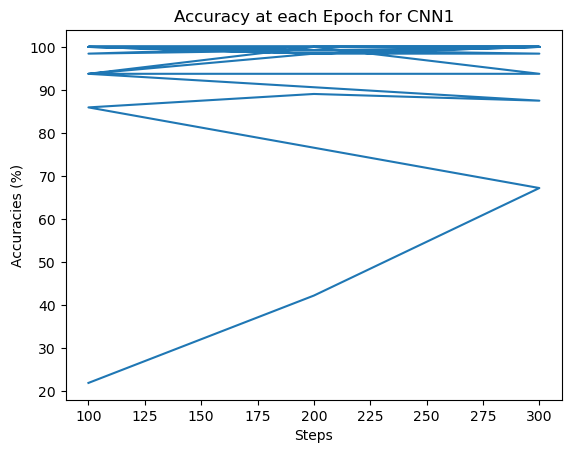

In [12]:
import matplotlib.pyplot as pyplot
import numpy as np

x_axis = np.array(steps_list)
y_axis = np.array(accuracy_list)

pyplot.title("Accuracy at each Epoch for CNN1")
pyplot.xlabel("Steps")
pyplot.ylabel("Accuracies (%)")
pyplot.plot(x_axis, y_axis)

pyplot.show()

In [ ]:
####### plot the the training loss here #########
num_epochs = 20
epochs = [i for i in range(num_epochs)]
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

for loss_function in hyper_parameters["loss_function"]:
    plt.plot(epochs,train_loss_hyper_paramaters[f'lf{loss_function}'],label=f'loss_function: {loss_function}')

plt.legend()